# Task 2: Is Rectangle?
<br>
Given four positive integers A, B, C, D, determine if there’s a rectangle such that the lengths of its sides are A, B, C and D (in any order). <br>
If any such rectangle exist return 1 else return 0.<br>
<br>
<code>
def is_rectangle (int:A, int:B, int:C, int:D):
    A : integer value that is one side of the rectangle.
    B : integer value that is one side of the rectangle.C : integer value that is one side of the rectangle.
    D : integer value that is one side of the rectangle.
    Return if is a rectangle return 1 else 0.
</code>

# Approach 1

The simple approach is generate all possible combination of 2 pairs of sides and check if each pair contains numbers that are equal to each other.<br>
<br>
Now let's consider that we have a quantum circuit to compare 2 numbers, then we'll follow following steps:
1) Generate all possible combinations of sides.
2) For each pairs of sides:
    i) Convert both numbers in pair to binary representation
    ii) Prefix number with less number of bits with 0 to make both numbers of same lengths in binary.
    iii) Intialize qbits states for both numbers according to binary representation.
    iv) Run the quantum circuit to generate result if 2 numbers are equal.
3) If both pairs have equal length sides, the combination can possibly generate a rectangle

### Binary Representation

Let's start with generating binary representation of the number. <br>

In [1]:
def convertToBinStr(num: int) -> str:
    """
    Generate binary string representation for decimal number.
    Note:- Not handling the negative numbers as the length of
    side can't be negative.
    """
    ans = ''
    if num == 0:
        return '0'
    while num:
        ans = str(num % 2) + ans
        num //= 2
    return ans

In [2]:
# Let's try out 3-4 numbers
# bin() converts decimal to binary in python
assert "0b"+format(convertToBinStr(8)) == bin(8), "Both representations are not equal"
assert "0b"+format(convertToBinStr(15)) == bin(15), "Both representations are not equal"
assert "0b"+format(convertToBinStr(894)) == bin(894), "Both representations are not equal"
assert "0b"+format(convertToBinStr(0)) == bin(0), "Both representations are not equal"

### Make both binary representations of same length
<br>
Binary representations of both numbers might not be of the same length. <br>
So , we'll prefix the smaller string with zeros <br>

In [3]:
from typing import Tuple

In [4]:
def equalizeLength(str1: str, str2: str) -> Tuple[str, str]:
    if len(str2) > len(str1):
        for _ in range(len(str1), len(str2)):
            str1 = '0' + str1
    elif len(str1) > len(str2):
        for _ in range(len(str2), len(str1)):
            str2 = '0' + str2
    return (str1, str2)

In [5]:
# Lets try out few examples here.
str1, str2 = equalizeLength(convertToBinStr(8), convertToBinStr(80))
print(str1, str2, len(str1) == len(str2))

str1, str2 = equalizeLength(convertToBinStr(15), convertToBinStr(13))
print(str1, str2, len(str1) == len(str2))

str1, str2 = equalizeLength(convertToBinStr(0), convertToBinStr(1387))
print(str1, str2, len(str1) == len(str2))

str1, str2 = equalizeLength(convertToBinStr(235), convertToBinStr(111003))
print(str1, str2, len(str1) == len(str2))

0001000 1010000 True
1111 1101 True
00000000000 10101101011 True
00000000011101011 11011000110011011 True


### Initialize Qbits according to binary representation
<br>
We'll use qiskit's <a href=https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html>Statevector.from_label</a> to initilize qbits from string.

In [6]:
from qiskit import QuantumCircuit, execute, BasicAer
from qiskit.quantum_info import Statevector

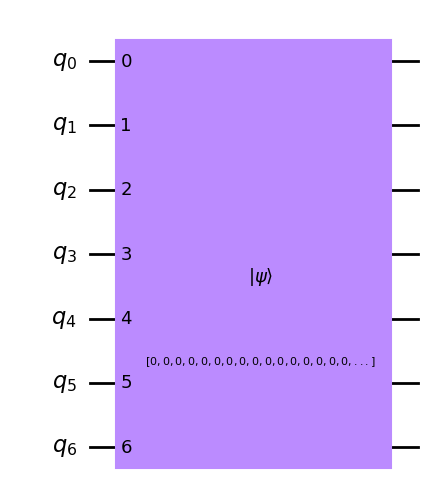

In [7]:
str1 = '1010000'
n = len(str1)
qc = QuantumCircuit(n)
qc.initialize(Statevector.from_label(str1), range(n))
qc.draw('mpl')

In [8]:
qc.measure_all()
execute(qc, backend=BasicAer.get_backend('qasm_simulator')).result().get_counts()

{'1010000': 1024}

We can achieve the same result using below function

In [9]:
def init(bit_str: str) -> QuantumCircuit:
    n_qbits = len(bit_str)
    qc = QuantumCircuit(n_qbits)
    for i, chr in enumerate(bit_str):
        if chr == '1':
            qc.x(n_qbits-i-1)
    return qc

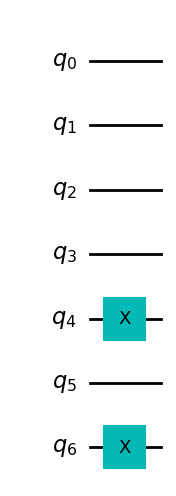

In [10]:
str1 = '1010000'
qc = init(str1)
qc.draw('mpl')

In [11]:
qc.measure_all()
execute(qc, backend=BasicAer.get_backend('qasm_simulator')).result().get_counts()

{'1010000': 1024}

## Quantum circuit
<br>
We want to check if 2 bits are same. In classical realm, we have XOR gate for this purpose.<br>
The truth table for XOR gate is as follows:


| Bit1 | Bit2 | Result
| :- |-------------: | :-:
| 0 | 0 | 0 
| 0 | 1 | 1 
| 1 | 0 | 1 
| 1 | 1 | 0 

In Quantum world, we can generate same results using 2 Qbits and 1 ancilla Qbit to read the results. <br>
And using 2 CNOT gates. Let's create this circuit.

In [12]:
def xor(bit1, bit2):
    qc = QuantumCircuit(3, 1)
    if bit1 == 1:
        qc.x(0)
    if bit2 == 1:
        qc.x(1)
    qc.barrier()
    qc.cx(0, 2)
    qc.cx(1, 2)
    qc.barrier()
    qc.measure(2, 0)
    return qc

In [13]:
bits = [[0, 0], [0, 1], [1, 0], [1, 1]]

In [14]:
for pair in bits:
    circ = xor(*pair)
    print("Circuit:\n")
    print(circ)
    counts = execute(circ, backend=BasicAer.get_backend('qasm_simulator')).result().get_counts()
    print("Bit 1: {}, Bit 2: {}, Result: {}".format(pair[0], pair[1], counts))
    print("\n\n\n\n")

Circuit:

      ░            ░    
q_0: ─░───■────────░────
      ░   │        ░    
q_1: ─░───┼────■───░────
      ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐
q_2: ─░─┤ X ├┤ X ├─░─┤M├
      ░ └───┘└───┘ ░ └╥┘
c: 1/═════════════════╩═
                      0 
Bit 1: 0, Bit 2: 0, Result: {'0': 1024}





Circuit:

           ░            ░    
q_0: ──────░───■────────░────
     ┌───┐ ░   │        ░    
q_1: ┤ X ├─░───┼────■───░────
     └───┘ ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐
q_2: ──────░─┤ X ├┤ X ├─░─┤M├
           ░ └───┘└───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0 
Bit 1: 0, Bit 2: 1, Result: {'1': 1024}





Circuit:

     ┌───┐ ░            ░    
q_0: ┤ X ├─░───■────────░────
     └───┘ ░   │        ░    
q_1: ──────░───┼────■───░────
           ░ ┌─┴─┐┌─┴─┐ ░ ┌─┐
q_2: ──────░─┤ X ├┤ X ├─░─┤M├
           ░ └───┘└───┘ ░ └╥┘
c: 1/══════════════════════╩═
                           0 
Bit 1: 1, Bit 2: 0, Result: {'1': 1024}





Circuit:

     ┌───┐ ░            ░    
q_0: ┤ X ├─░───■────────░────


## Extending circuit for n-bit number
<br>
We'll repeat the above circuit for n-bits. <br>
For 2 n-bit numbers, we'll require n qbits each , so total of 2n qbits to represent 2 bits. <br>
And we'll require n ancilla qbits to read the results. <br>
So we'll need 3n qbits and n classical registers to read the results <br> 
We'll check if the result is 000..(n times) so that both the numbers match <br>

In [15]:
def compareNumbers(str1: str, str2: str) -> QuantumCircuit:
    length = len(str1)
    qc = QuantumCircuit(3 * length, length)
    for i, (bit1, bit2) in enumerate(zip(str1, str2)):
        if bit1 == '1':
            qc.x(i)
        if bit2 == '1':
            qc.x(length + i)
        qc.cx(i, 2*length+i)
        qc.cx(length+i, 2*length+i)
        qc.measure(2*length+i, i)
    return qc

In [16]:
# Let's try out this circuit
str1 = '1010000'
str2 = '1010000'
qc = compareNumbers(str1, str2)
print("Circuit: \n")
print(qc)
print(f"\n Let's run the circuit, {str1} and {str2} should be equal")
counts = execute(qc, backend=BasicAer.get_backend('qasm_simulator')).result().get_counts()
print(counts)

Circuit: 

      ┌───┐                                                                 »
 q_0: ┤ X ├───────────────────────────■─────────────────────────────────────»
      └───┘                           │                                     »
 q_1: ───────■────────────────────────┼─────────────────────────────────────»
      ┌───┐  │                        │                                     »
 q_2: ┤ X ├──┼────────────────────────┼─────────■───────────────────────────»
      └───┘  │                        │         │                           »
 q_3: ───────┼────■───────────────────┼─────────┼───────────────────────────»
             │    │                   │         │                           »
 q_4: ───────┼────┼────■──────────────┼─────────┼───────────────────────────»
             │    │    │              │         │                           »
 q_5: ───────┼────┼────┼────■─────────┼─────────┼───────────────────────────»
             │    │    │    │         │         │    

In [17]:
# Let's try out this circuit
str1 = '1010000'
str2 = '0000011'
qc = compareNumbers(str1, str2)
print("Circuit: \n")
print(qc)
print(f"\n Let's run the circuit, {str1} and {str2} should not be equal")
counts = execute(qc, backend=BasicAer.get_backend('qasm_simulator')).result().get_counts()
print(counts)

Circuit: 

      ┌───┐                                                                 »
 q_0: ┤ X ├───────────────────────────■─────────────────────────────────────»
      └───┘                           │                                     »
 q_1: ──■─────────────────────────────┼─────────────────────────────────────»
        │  ┌───┐                      │                                     »
 q_2: ──┼──┤ X ├──────────────────────┼─────────■───────────────────────────»
        │  └───┘                      │         │                           »
 q_3: ──┼────■────────────────────────┼─────────┼───────────────────────────»
        │    │                        │         │                           »
 q_4: ──┼────┼────■───────────────────┼─────────┼───────────────────────────»
        │    │    │                   │         │                           »
 q_5: ──┼────┼────┼─────────■─────────┼─────────┼───────────────────────────»
        │    │    │         │         │         │    

## Putting everything together

Now let's put everything together: <br>
With lengths of 4 sides A, B, C, D we have 3 combinations to check:
1) A-B and c-D
2) A-C and B-D
3) A-D and B-C
<br>
For each combination, we'll run the quantum circuit above and check if both pairs are equal. <br>
If its true for even for one combination, we say that this combination of lengths can possibly form <br>
a rectangle <br>

In [18]:
from typing import List

In [19]:
from itertools import combinations

In [20]:
def yieldAllPairs(lst: List[int]) -> List[List[int]]:
    if lst == []:
        yield []
        return
    ll = lst[1:]
    for j in range(len(ll)):
        for end in yieldAllPairs(ll[:j] + ll[j+1:]):
            yield [(lst[0], ll[j])] + end

In [21]:
def getCircuit(str1: str, str2: str) -> QuantumCircuit:
    length = len(str1)
    print(str1, str2)
    qc = QuantumCircuit(3 * length, length)
    for i, (bit1, bit2) in enumerate(zip(str1, str2)):
        if bit1 == '1':
            qc.x(i)
        if bit2 == '1':
            qc.x(length + i)
        qc.cx(i, 2*length+i)
        qc.cx(length+i, 2*length+i)
        qc.measure(2*length+i, i)
    return qc

In [22]:
def compareNumbers(num1: int, num2: int) -> bool:
    # Make each number of same length
    str1, str2 = equalizeLength(num1, num2)
    
    # Generate circuit to compare numbers
    circ = getCircuit(str1, str2)
    print(circ)
    
    # Answer should be 000..(n times)
    # Lets get expected answer ready to
    # compare with circuit output.
    actual_ans = '0' * len(str1)
    
    # Run the circuit and generate counts.
    generated_ans = execute(circ, backend=BasicAer.get_backend('qasm_simulator')).result().get_counts()
    print(generated_ans)
    
    # Generated answer should have only 1 output with 100% probably
    # i.e. all 1024 shots should have same results.
    # And that result should be 000...(n times)
    if len(list(generated_ans.keys())) == 1 and generated_ans[list(generated_ans.keys())[0]] == 1024:
        if list(generated_ans.keys())[0] == actual_ans:
            return True
        
    return False

In [23]:
def isRectangle(lengths: List[int]) -> bool:
    assert all(i > 0 for i in lengths), "Length of side must be > 0."
    
    # Now convert all the numbers to their binary representation.
    bin_lengths = [convertToBinStr(num) for num in lengths]
    
    # Let's generate all possible combination of pairs
    pairs_gen = yieldAllPairs(bin_lengths)
    
    # For each combination, check if both pairs have 
    # equal numbers.
    for pairs in pairs_gen:
        if compareNumbers(*pairs[0]) and compareNumbers(*pairs[1]):
            return True
    
    return False

In [24]:
# Let's test the code with few examples
lengths = [8, 12, 12, 8]

isRectangle(lengths)

1000 1100
      ┌───┐                                                 
 q_0: ┤ X ├─────────────────■───────────────────────────────
      └───┘                 │                               
 q_1: ───────■──────────────┼───────────────────────────────
             │              │                               
 q_2: ───────┼────■─────────┼───────────────────────────────
             │    │         │                               
 q_3: ───────┼────┼────■────┼───────────────────────────────
      ┌───┐  │    │    │    │                               
 q_4: ┤ X ├──┼────┼────┼────┼───────────────────■───────────
      ├───┤  │    │    │    │                   │           
 q_5: ┤ X ├──┼────┼────┼────┼────■──────────────┼───────────
      └───┘  │    │    │    │    │              │           
 q_6: ───────┼────┼────┼────┼────┼────■─────────┼───────────
             │    │    │    │    │    │         │           
 q_7: ───────┼────┼────┼────┼────┼────┼────■────┼───────────
             │

True

In [25]:
lengths = [8, 15, 12, 8]

isRectangle(lengths)

1000 1111
      ┌───┐                                                 
 q_0: ┤ X ├─────────────────■───────────────────────────────
      └───┘                 │                               
 q_1: ───────■──────────────┼───────────────────────────────
             │              │                               
 q_2: ───────┼────■─────────┼───────────────────────────────
             │    │         │                               
 q_3: ───────┼────┼────■────┼───────────────────────────────
      ┌───┐  │    │    │    │                               
 q_4: ┤ X ├──┼────┼────┼────┼───────────────────■───────────
      ├───┤  │    │    │    │                   │           
 q_5: ┤ X ├──┼────┼────┼────┼────■──────────────┼───────────
      ├───┤  │    │    │    │    │              │           
 q_6: ┤ X ├──┼────┼────┼────┼────┼────■─────────┼───────────
      ├───┤  │    │    │    │    │    │         │           
 q_7: ┤ X ├──┼────┼────┼────┼────┼────┼────■────┼───────────
      └───┘  │

False

In [26]:
lengths = [8, 12, -12, 8]

isRectangle(lengths)

AssertionError: Length of side must be > 0.

# Approach 2
<br>
One of the problem with above approach is number of qbits and number of classical bits required. <br>
For numbers with N bit representation, this requires 3N Qbits and N classical bits <br>
Also, we need to compare 2 pairs of numbers separately, so for 4 side lengths, we end up doing 6 comparisons <br>
So, we can think of better approach. <br>
<br>
Two states are equal if inner product of two states is 0 <br>
And we can find out the inner product between 2 states using swap test. <br>

## Swap Test
<br>
The swap test uses 1 ancilla qbit which is put into superposition with a Hadamard gate.<br>
Then the controlled swap gate is applied to 2 qbits representing the states contorlled on ancilla qbit<br>
The Hadamard gate is applied again to ancilla qbit and this ancilla qbit state is measured <br>
If both qbits have equal states then ancilla qbit will be |0> <br>
However if the states of both qbits are orthogonal ancilla qbit will be |0〉or |1〉with equal probability. 

In [27]:
from qiskit import QuantumRegister, ClassicalRegister

In [28]:
# Let's code the swap test gate
def swapTest(num1: int, num2: int)-> QuantumCircuit:
    q = QuantumRegister(3,'q')
    c = ClassicalRegister(1,'c')
    circuit = QuantumCircuit(q,c)
    circuit.h(q[0])
    if num1 == 1:
        circuit.x(q[1])
    if num2 == 1:
        circuit.x(q[2])
    circuit.cswap(q[0],q[1],q[2]) # Contolled SWAP gate
    circuit.h(q[0]) 
    circuit.measure(q[0],c[0])
    return circuit

In [29]:
nums = [[0, 0], [0, 1], [1, 0], [1, 1]]

In [30]:
for num in nums:
    qc = swapTest(*num)
    
    print("Circuit: \n")
    print(qc)
    
    # run the circuit and measure the result.
    counts = execute(qc, backend=BasicAer.get_backend('qasm_simulator')).result().get_counts()
    
    print(f"Num1: {num[0]}, Num2: {num[1]}, Ans: {counts}")
    print("\n\n\n")

Circuit: 

     ┌───┐   ┌───┐┌─┐
q_0: ┤ H ├─■─┤ H ├┤M├
     └───┘ │ └───┘└╥┘
q_1: ──────X───────╫─
           │       ║ 
q_2: ──────X───────╫─
                   ║ 
c: 1/══════════════╩═
                   0 
Num1: 0, Num2: 0, Ans: {'0': 1024}




Circuit: 

     ┌───┐   ┌───┐┌─┐
q_0: ┤ H ├─■─┤ H ├┤M├
     └───┘ │ └───┘└╥┘
q_1: ──────X───────╫─
     ┌───┐ │       ║ 
q_2: ┤ X ├─X───────╫─
     └───┘         ║ 
c: 1/══════════════╩═
                   0 
Num1: 0, Num2: 1, Ans: {'0': 500, '1': 524}




Circuit: 

     ┌───┐   ┌───┐┌─┐
q_0: ┤ H ├─■─┤ H ├┤M├
     ├───┤ │ └───┘└╥┘
q_1: ┤ X ├─X───────╫─
     └───┘ │       ║ 
q_2: ──────X───────╫─
                   ║ 
c: 1/══════════════╩═
                   0 
Num1: 1, Num2: 0, Ans: {'0': 539, '1': 485}




Circuit: 

     ┌───┐   ┌───┐┌─┐
q_0: ┤ H ├─■─┤ H ├┤M├
     ├───┤ │ └───┘└╥┘
q_1: ┤ X ├─X───────╫─
     ├───┤ │       ║ 
q_2: ┤ X ├─X───────╫─
     └───┘         ║ 
c: 1/══════════════╩═
                   0 
Num1: 1, Num2: 1, Ans: {'0': 

Now for each combination of pair of lengths (A-B, C-D), we'll follow below steps:
<br>
1) We'll initialize 3 QuantumRegisters each with 2 qbits and 1 ClassicalRegister with 2 bits to read result.
2) We'll encode the numbers into qbit using rotation gate and angle equivalent to the arcsin of numbers.
3) We'll apply the swap test gate
4) We'll check the measurement result, if the result is |00> with 100% probabaility then both the states in each pair are equal.

In [31]:
import numpy as np

In [32]:
def getCircuit2(pair1: Tuple[int, int], pair2: Tuple[int, int])-> QuantumCircuit:
    qrs = [QuantumRegister(2) for _ in range(3)]
    cr = ClassicalRegister(2)
    
    # Create the quantum circuit
    qc = QuantumCircuit(*qrs, cr)
    
    qc.ry(2*np.arcsin(pair1[0]), qrs[1][0])
    qc.ry(2*np.arcsin(pair1[1]), qrs[1][1])
    qc.ry(2*np.arcsin(pair2[0]), qrs[2][0])
    qc.ry(2*np.arcsin(pair2[1]), qrs[2][1])

    # Apply the swap circuit
    qc.h(qrs[0])
    qc.cswap(qrs[0][0], qrs[1][0], qrs[1][1])
    qc.cswap(qrs[0][1], qrs[2][0], qrs[2][1])
    qc.h(qrs[0])

    # Measure ancilla qubits without collapsing the wavefunction
    qc.measure(qrs[0][0], cr[0])
    qc.measure(qrs[0][1], cr[1])
    
    return qc

In [33]:
# Now we'll just check if the result is |00>
def isRectangle(lengths: List[int]) -> bool:
    assert all(i > 0 for i in lengths), "Length of side must be > 0."
    
    # normalize the lengths
    lengths = [length/max(lengths) for length in lengths]
    
    # Let's generate all possible combination of pairs
    pairs_gen = yieldAllPairs(lengths)
    
    # For each combination, check if both pairs have 
    # equal numbers.
    for pairs in pairs_gen:
        qc = getCircuit2(pairs[0], pairs[1])
        print("Circuit:\n")
        print(qc)
        
        counts = execute(qc, backend=BasicAer.get_backend('qasm_simulator')).result().get_counts()
        print(counts)
        
        if len(list(counts.keys())) == 1 and counts[list(counts.keys())[0]] == 1024:
            print(counts[list(counts.keys())[0]])
            if list(counts.keys())[0] == '00':
                return True
    
    return False

In [34]:
# Now let's again run few examples
lengths = [8, 12, 12, 8]

isRectangle(lengths)

Circuit:

           ┌───┐        ┌───┐     ┌─┐   
q77_0: ────┤ H ├──────■─┤ H ├─────┤M├───
           ├───┤      │ └───┘┌───┐└╥┘┌─┐
q77_1: ────┤ H ├──────┼───■──┤ H ├─╫─┤M├
       ┌───┴───┴────┐ │   │  └───┘ ║ └╥┘
q78_0: ┤ Ry(1.4595) ├─X───┼────────╫──╫─
       └─┬───────┬──┘ │   │        ║  ║ 
q78_1: ──┤ Ry(π) ├────X───┼────────╫──╫─
         ├───────┤        │        ║  ║ 
q79_0: ──┤ Ry(π) ├────────X────────╫──╫─
       ┌─┴───────┴──┐     │        ║  ║ 
q79_1: ┤ Ry(1.4595) ├─────X────────╫──╫─
       └────────────┘              ║  ║ 
 c0: 2/════════════════════════════╩══╩═
                                   0  1 
{'00': 523, '01': 212, '10': 214, '11': 75}
Circuit:

           ┌───┐        ┌───┐     ┌─┐   
q84_0: ────┤ H ├──────■─┤ H ├─────┤M├───
           ├───┤      │ └───┘┌───┐└╥┘┌─┐
q84_1: ────┤ H ├──────┼───■──┤ H ├─╫─┤M├
       ┌───┴───┴────┐ │   │  └───┘ ║ └╥┘
q85_0: ┤ Ry(1.4595) ├─X───┼────────╫──╫─
       └─┬───────┬──┘ │   │        ║  ║ 
q85_1: ──┤ Ry(π) ├────X───┼───────

True

In [35]:
lengths = [8, 123, 712, 98]

isRectangle(lengths)

Circuit:

             ┌───┐         ┌───┐     ┌─┐   
 q98_0: ─────┤ H ├───────■─┤ H ├─────┤M├───
             ├───┤       │ └───┘┌───┐└╥┘┌─┐
 q98_1: ─────┤ H ├───────┼───■──┤ H ├─╫─┤M├
        ┌────┴───┴─────┐ │   │  └───┘ ║ └╥┘
 q99_0: ┤ Ry(0.022472) ├─X───┼────────╫──╫─
        ├─────────────┬┘ │   │        ║  ║ 
 q99_1: ┤ Ry(0.34725) ├──X───┼────────╫──╫─
        └──┬───────┬──┘      │        ║  ║ 
q100_0: ───┤ Ry(π) ├─────────X────────╫──╫─
        ┌──┴───────┴──┐      │        ║  ║ 
q100_1: ┤ Ry(0.27616) ├──────X────────╫──╫─
        └─────────────┘               ║  ║ 
  c3: 2/══════════════════════════════╩══╩═
                                      0  1 
{'10': 506, '00': 510, '01': 5, '11': 3}
Circuit:

             ┌───┐         ┌───┐     ┌─┐   
q105_0: ─────┤ H ├───────■─┤ H ├─────┤M├───
             ├───┤       │ └───┘┌───┐└╥┘┌─┐
q105_1: ─────┤ H ├───────┼───■──┤ H ├─╫─┤M├
        ┌────┴───┴─────┐ │   │  └───┘ ║ └╥┘
q106_0: ┤ Ry(0.022472) ├─X───┼────────╫──╫─
        └──┬───

False